# Busy Kernel - CMPINF0010 Final Project

![Pokemon](https://media.giphy.com/media/xuXzcHMkuwvf2/giphy.gif).

For this project, we wanted to find which neighborhood in Pittsburgh would be the best for playing Pokemon Go. In the game, Pokemon tend to spawn in parks, so we knew that one of our metrics would measure the size of the parks in each neighborhood. We also discovered that most Pokemon Go players are adults, so neighborhoods with less children could correlate to more Pokemon Go players. Furthermore, when you're walking around staring at your phone, you don't want to have to be super aware of your surroundings, so our third metric measured how safe a neighborhood is by looking at the recent police reports.  

So, ideally, the best neighborhood will have:  
-the least number of police reports (fewer police reports = less crimes = more safe)  
-the largest park 
-the least children  


### Before we begin, we'll import pandas and read in all of our data sets

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas 

#read in files
data = pd.read_csv("https://data.wprdc.org/dataset/27b6eef7-8825-4cc4-8b48-52c17ac80d37/resource/7b0660d1-c812-496d-ab0a-8560902e9e70/download/neighborhood_school_enrollment.csv")
pd.DataFrame(data)
pop = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv")
crimes = pd.read_csv("https://data.wprdc.org/datastore/dump/1797ead8-8262-41cc-9099-cbc8a161924b")
park = pd.read_csv("https://data.wprdc.org/datastore/dump/bb57d0a7-e8ee-4218-8906-0dedc903038c")

### 1st Metric: Determine neighborhood with least number of police reports

In [20]:
#make dictionary
crimes_dict = dict()

#read through and add to dictionary
for row in range(len(crimes)):
    #get the neighborhood name
    name = crimes.loc[row, 'INCIDENTNEIGHBORHOOD']
    
    #if it's already in the dictionary:
    if name in crimes_dict:
        crimes_dict[name] += 1
    #if not set it equal to 1
    else:
        crimes_dict[name] = 1

#make it a series for sorting
num_crimes_series = pd.Series(crimes_dict, name = 'Neighborhoods')

#print
num_crimes_series.sort_values()[:]

Ridgemont                      1
Outside County                 1
Summer Hill                    2
Hays                           2
Swisshelm Park                 2
                            ... 
Brookline                     79
Mount Washington              96
Carrick                      105
South Side Flats             135
Central Business District    253
Name: Neighborhoods, Length: 94, dtype: int64

#### This is a lot of neighborhoods. Let's look at the top 10 with the least and graph it

Text(0, 0.5, 'Total amount of reports')

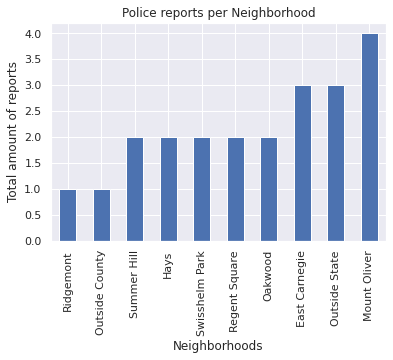

In [21]:
sns.set()

num_crimes_series.sort_values()[:10].plot.bar()
plt.title('Police reports per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total amount of reports')


#### However, these top neighborhoods also have the lowest populations, so let's consider population now

Text(0, 0.5, 'Total amount of reports/population')

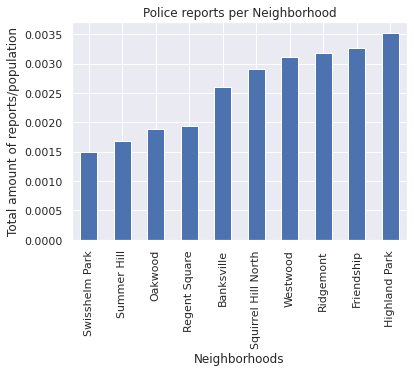

In [22]:
#read through and add to dictionary
for row in range(len(pop)):
    #get the neighborhood name
    name = pop.loc[row, 'Neighborhood']
    
    #if it's already in the dictionary:
    if name in crimes_dict:
        crime_rate = crimes_dict[name]/pop.loc[row, 'Estimate; Total']
        crimes_dict[name] = crime_rate

#make it a series for sorting
pop_series = pd.Series(crimes_dict, name = 'Population of Neighborhoods')

#graph it
pop_series.sort_values()[:10].plot.bar()
plt.title('Police reports per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total amount of reports/population')

#### Now that we consider population, we can see that the neighborhoods with the lowest crime rates are completely different  

Scoring:  
The top neighborhood will get 10 points, and the 10th neighborhood will get 1

In [23]:
#make a sorted dictionary
sort = pop_series.sort_values().to_dict()
hood_rank = dict()

i=10
#add score to first 10 items
for key in sort:
    hood_rank[key] = i
    i-=1
    if i==0:
        break

print(hood_rank)

{'Swisshelm Park': 10, 'Summer Hill': 9, 'Oakwood': 8, 'Regent Square': 7, 'Banksville': 6, 'Squirrel Hill North': 5, 'Westwood': 4, 'Ridgemont': 3, 'Friendship': 2, 'Highland Park': 1}


#### So, the top neighborhood based on crime rate is Swisshelm Park

### 2nd Metric: Determine the neighborhood with the least amount of kids  
Oddly enough, we discovered that majority of Pokemon Go players are adults. With that in mind, we decided to factor in the  number of children in an area as a criteria. In order to do so, we used school enrollment data by neighborhood to determine which neighborhood had the lowest number of children. The lower the amount of children, the better in this metric.

To start, we read through the dataset and created a dataframe.

In [24]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas 

data = pd.read_csv("https://data.wprdc.org/dataset/27b6eef7-8825-4cc4-8b48-52c17ac80d37/resource/7b0660d1-c812-496d-ab0a-8560902e9e70/download/neighborhood_school_enrollment.csv")
pd.DataFrame(data)

,neighborhood,school,enrolled_students
0,Allegheny Center,Other,50
1,Allegheny Center,PITTSBURGH KING PreK-8,34
2,Allentown,Other,96
3,Allentown,PITTSBURGH GRANDVIEW PreK-5,76
4,Allentown,PITTSBURGH SOUTH HILLS 6-8,50
...,...,...,...
501,Wilkinsburg Borough,Other,72
502,Windgap,Other,50
503,Windgap,PITTSBURGH WESTWOOD K-5,29
504,Windgap,PITTSBURGH BRASHEAR HIGH SCHOOL,19


We noticed that this dataset includes multiple schools within the same neighborhood. We wanted to condense the data in order to only show one row per neighborhood and have the total number of children per neighborhood be shown as the final value. In order to simplify the data, we made a dictionary in order to condense the information. 

In [25]:
#make dictionary
kids_dict = dict()

#read through and add to dictionary
for row in range(len(data)):
    #get the neighborhood name
    name = data.loc[row, 'neighborhood']
    
    #if it's already in the dictionary:
    if name in kids_dict:
        kids_dict[name] += data.loc[row, 'enrolled_students']
    #if not set it equal to the value
    else:
        kids_dict[name] = data.loc[row, 'enrolled_students']

#make it a series for sorting
num_kids_series = pd.Series(kids_dict, name = 'neighborhood')

#print
num_kids_series.sort_values()[:]

North Oakland            11
Central Oakland          16
Golden Triangle          18
Ridgemont                20
Saint Clair              25
                       ... 
Squirrel Hill South     679
Sheraden                694
Beechview               794
Brookline              1169
Carrick                1276
Name: neighborhood, Length: 87, dtype: int64

Condensing the data made it a lot easier to work with. But even in this state, there were still many rows that were significantly outside the range we were going for.

To narrow down the results, the top ten neighborhoods with the least amount of students is plotted.

Text(0, 0.5, 'Number of students')

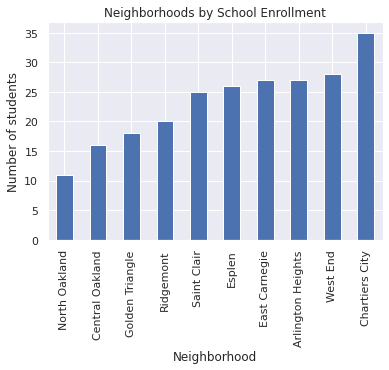

In [26]:
sns.set()
num_kids_series.sort_values()[:10].plot.bar()
plt.title('Neighborhoods by School Enrollment')
plt.xlabel('Neighborhood')
plt.ylabel('Number of students')

Alas, we can start to see some neighborhoods separate themselves from the rest of the pack. But just to make sure, I created a pie chart with the top 5 nieghborhoods. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9f1609460>],
      dtype=object)

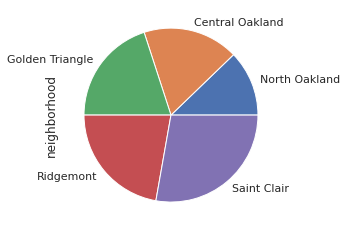

In [27]:
num_kids_series.sort_values()[:5].plot.pie(subplots=True)

#### Conclusion  
North Oakland won the gold in a close competition for best neighborhood to play Pokemon Go in according to my metric. North Oakland only has 11 children enrolled in school. Considering that Oakland itself is primarially a college town, this makes  a lot of sense. Specifically, North Oakland is home to half of the University of Pittsburgh's halls and academic buildings. Not many children to be found. 

In [28]:

sort_2 = num_kids_series.sort_values().to_dict()

i=10
#add score to first 10 items
for key in sort_2:
    if key in hood_rank:
        hood_rank[key] += i
    else:
        hood_rank[key] = i
    i-=1
    if i==0:
        break

print(hood_rank)

{'Swisshelm Park': 10, 'Summer Hill': 9, 'Oakwood': 8, 'Regent Square': 7, 'Banksville': 6, 'Squirrel Hill North': 5, 'Westwood': 4, 'Ridgemont': 10, 'Friendship': 2, 'Highland Park': 1, 'North Oakland': 10, 'Central Oakland': 9, 'Golden Triangle': 8, 'Saint Clair': 6, 'Esplen': 5, 'East Carnegie': 4, 'Arlington Heights': 3, 'West End': 2, 'Chartiers City': 1}


### 2nd Metric: Determine neighborhood with largest  


In [14]:
#sorting the dataset so it only contains columns that are necessary 
park = park[park.columns[park.columns.isin(['updatepknm', 'sqft', 'final_cat'])]]

#making the sqft column slightly larger so the value does not have to be in scientific notation 
park.style.set_properties(subset=['sqft'], **{'width': '100px'})

#showing the first 10 to make sure everything needed is there 
park.head(10)

,sqft,final_cat,updatepknm
0,41775.367101,Neighborhood Park,August Wilson Park
1,89738.347520,Neighborhood Park,Young Field Park
2,20415.724875,Neighborhood Park,Roland Lockridge Community Park
3,85178.182207,Neighborhood Park,Friendship Park
4,222506.623799,Neighborhood Park,Heth's Park
5,37193.575085,Regional Park,Emerald View Park - Eileen McCoy Park
6,53049.723690,Neighborhood Park,Pauline Park
7,13766.279986,Beautification Site,Thomas Park
8,362428.031294,Community Park,Herschel Park
9,142337.220029,Public School,Westwood School Park


In [15]:
#setting the values in decending order 
park['sqft'].value_counts().sort_values(ascending =False)

4.177537e+04    1
5.669081e+02    1
2.041572e+04    1
8.517818e+04    1
2.225066e+05    1
               ..
2.499524e+04    1
7.498057e+04    1
2.457023e+03    1
6.072921e+06    1
1.859561e+05    1
Name: sqft, Length: 215, dtype: int64

In [16]:
#query mask that only shows sqft values that are greater than 250000
SQFT_query_mask = park['sqft'] > 250000

#query mark that only shows parks that are labeled as Neighborhood Parks 
neighborhoodpark_query_mask = park['final_cat'] == "Neighborhood Park"

#combining the two query marks just created into one 
park_query_mark = park[neighborhoodpark_query_mask & SQFT_query_mask]

#showing the first 10 values of the new query mask 
park_query_mark.head(10)

,sqft,final_cat,updatepknm
21,374288.826464,Neighborhood Park,Volunteers Park
26,306810.614843,Neighborhood Park,Chadwick Park
41,412890.666953,Neighborhood Park,Fort Pitt Park
62,267749.559983,Neighborhood Park,Magee Park
67,279564.413966,Neighborhood Park,Spring Hill Park
73,585212.453438,Neighborhood Park,Kennard Park
81,260983.494963,Neighborhood Park,Paul J. Sciullo II Memorial Park
84,352034.490849,Neighborhood Park,Ammon Park
94,252996.887663,Neighborhood Park,Devlin Field Park
102,262576.206328,Neighborhood Park,Leslie Park


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

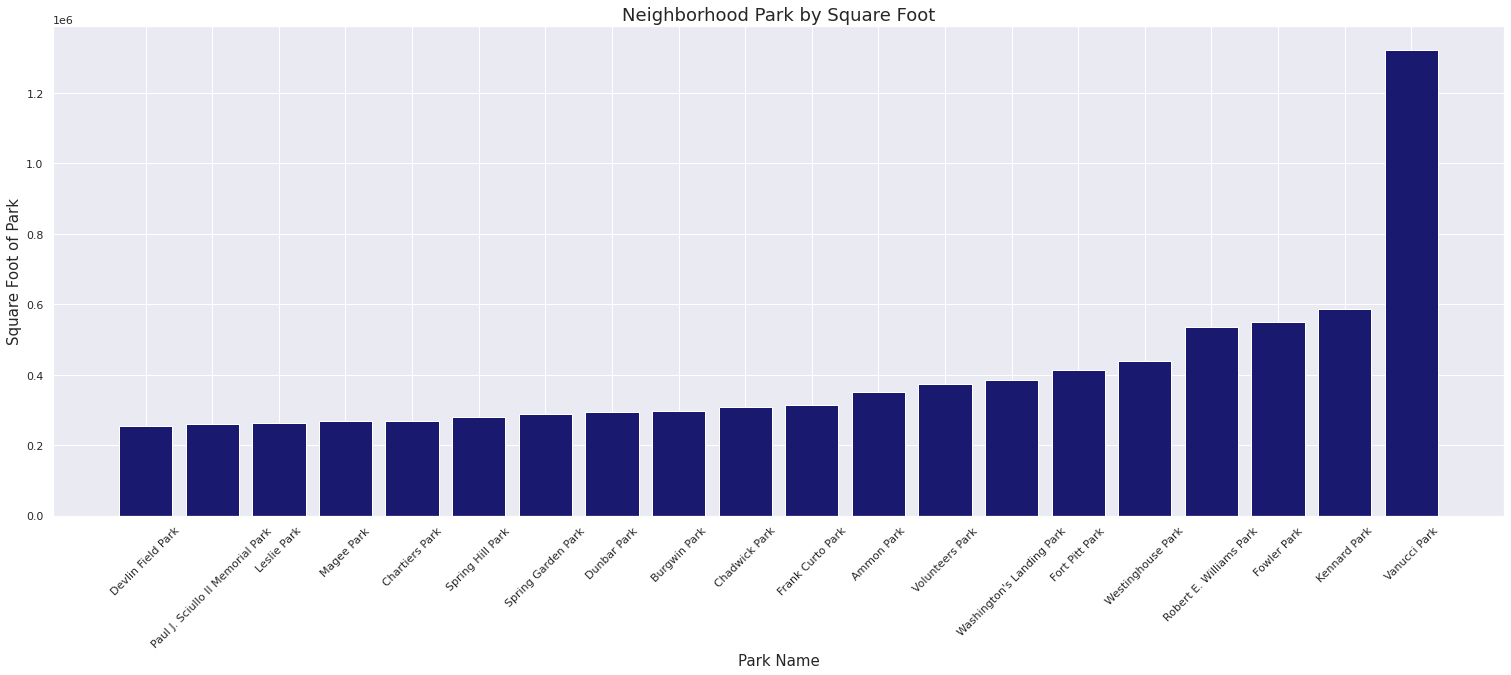

In [24]:
#changing figure size 
plt.figure(figsize=(26,9))

#sorting query mask in ascending order 
park_sorted = park_query_mark.sort_values('sqft')

#plotting the bar graph and changing the color 
plt.bar(x=park_sorted['updatepknm'],
        height=park_sorted['sqft'],
        color='midnightblue')

#setting graph and axis titles 
plt.title("Neighborhood Park by Square Foot",size=18)
plt.xlabel("Park Name", size=15)
plt.ylabel("Square Foot of Park", size=15)

#rotating the park names at an angle 
plt.xticks(rotation=45)